In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import stripROtools
from stripROtools import colors


# Gain stability

In [2]:
# Read PHA data
df_UHDLC = pd.read_csv("~/Desktop/PHA_data/PHA_data-Gain_stability_UH_DLC.csv")
df_UHNoDLC = pd.read_csv("~/Desktop/PHA_data/PHA_data-Gain_stability_UH_NoDLC.csv")
df_UoS = pd.read_csv("~/Desktop/PHA_data/PHA_data-Gain_stability_UoS.csv")

In [3]:
# Fitting uncertainty and a 2.2% systematic uncertainty
def get_G_sigma(df):
    return np.sqrt(df.Gmean_err**2 + (df.Gmean*0.022)**2)

In [4]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.exp_plat, df_UHDLC.Time,df_UHDLC.Gmean, sigma = get_G_sigma(df_UHDLC), absolute_sigma=True, p0=(5000, 0.1, 5))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.exp_plat, df_UHNoDLC.Time,df_UHNoDLC.Gmean, sigma = get_G_sigma(df_UHNoDLC), absolute_sigma=True, p0=(5000, 0.1, 5))
coeff_UoS, covar_UoS = curve_fit(stripROtools.exp_plat, df_UoS.Time,df_UoS.Gmean, sigma = get_G_sigma(df_UoS), absolute_sigma=True, p0=(5000, 0.1, 5))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

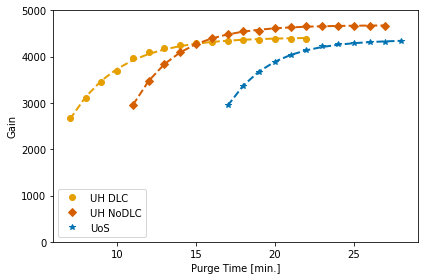

In [5]:
# Plot the data and fits

plt.plot(df_UHDLC.Time,df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = stripROtools.exp_plat(df_UHDLC.Time,*coeff_UHDLC)
plt.plot(df_UHDLC.Time, fit_UHDLC, linestyle ='--', color =colors['orange'],linewidth=2)


plt.plot(df_UHNoDLC.Time,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = stripROtools.exp_plat(df_UHNoDLC.Time,*coeff_UHNoDLC)
plt.plot(df_UHNoDLC.Time, fit_UHNoDLC, linestyle ='--', color = colors['red'], linewidth=2)


plt.plot(df_UoS.Time,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = stripROtools.exp_plat(df_UoS.Time,*coeff_UoS)
plt.plot(df_UoS.Time, fit_UoS, linestyle ='--', color = colors['blue'], linewidth=2)


plt.legend()
plt.ylabel("Gain")
plt.xlabel("Purge Time [min.]")
plt.ylim(0,5000)
plt.tight_layout()

plt.savefig("./figures/gain_stability.pdf")


In [6]:
# Calculate how far into the plateau each detector is at the final gain measurement
print("UH DLC: ", 1-np.exp(-coeff_UHDLC[1]*(np.max(df_UHDLC.Time)-coeff_UHDLC[2])))
print("UH NoDLC: ", 1-np.exp(-coeff_UHNoDLC[1]*(np.max(df_UHNoDLC.Time)-coeff_UHNoDLC[2])))
print("UoS: ", 1-np.exp(-coeff_UoS[1]*(np.max(df_UoS.Time)-coeff_UoS[2])))


UH DLC:  0.9966461172860367
UH NoDLC:  0.9988306041038124
UoS:  0.9942019116950177


# Gain versus Vmesh

In [7]:
df_UHDLC = pd.read_csv("~/Desktop/PHA_data/PHA_data-Vmesh_UH_DLC.csv")
df_UHNoDLC = pd.read_csv("~/Desktop/PHA_data/PHA_data-Vmesh_UH_NoDLC.csv")
df_UoS = pd.read_csv("~/Desktop/PHA_data/PHA_data-Vmesh_UoS.csv")

In [8]:
# Fitting uncertainty and a 2.2% systematic uncertainty, propogate through natural log
def get_logG_sigma(df):
    return np.sqrt(df.Gmean_err**2 + (df.Gmean*0.022)**2)/df.Gmean

In [9]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.linear, df_UHDLC.MeshVoltage,np.log(df_UHDLC.Gmean), sigma = get_logG_sigma(df_UHDLC), absolute_sigma=True, p0=(0.03, 0))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.linear, df_UHNoDLC.MeshVoltage,np.log(df_UHNoDLC.Gmean), sigma = get_logG_sigma(df_UHNoDLC), absolute_sigma=True, p0=(0.03, 0))
coeff_UoS, covar_UoS = curve_fit(stripROtools.linear, df_UoS.MeshVoltage,np.log(df_UoS.Gmean), sigma = get_logG_sigma(df_UoS), absolute_sigma=True, p0=(0.03, 0))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

print("UH DLC: a = ", coeff_UHDLC[0], "+/-", perr_UHDLC[0], ", b = ", coeff_UHDLC[1], "+/-", perr_UHDLC[1] )
print("UH NoDLC: a = ", coeff_UHNoDLC[0], "+/-", perr_UHNoDLC[0], ", b = ", coeff_UHNoDLC[1], "+/-", perr_UHNoDLC[1] )
print("UH UoS: a = ", coeff_UoS[0], "+/-", perr_UoS[0], ", b = ", coeff_UoS[1], "+/-", perr_UoS[1] )

UH DLC: a =  0.021885279809087183 +/- 0.00018401308755298704 , b =  -5.626265091091201 +/- 0.11885907527112413
UH NoDLC: a =  0.02076606279468505 +/- 0.00033977221267720404 , b =  -4.844868535473523 +/- 0.21250724827551676
UH UoS: a =  0.020552320169588387 +/- 7.929544250637165e-05 , b =  -9.292717959902962 +/- 0.07152753073858824


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


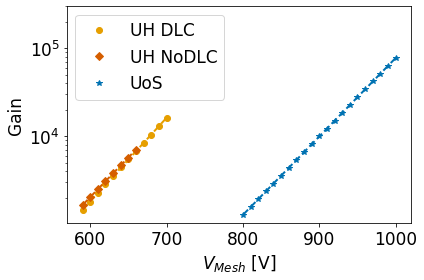

In [10]:
# Plot log(Gain) versus mesh voltage
plt.plot(df_UHDLC.MeshVoltage, df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = np.exp(stripROtools.linear(df_UHDLC.MeshVoltage,*coeff_UHDLC))
plt.plot(df_UHDLC.MeshVoltage, fit_UHDLC, linestyle ='--', color = colors['orange'],linewidth=2)

plt.plot(df_UHNoDLC.MeshVoltage,df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = np.exp(stripROtools.linear(df_UHNoDLC.MeshVoltage,*coeff_UHNoDLC))
plt.plot(df_UHNoDLC.MeshVoltage, fit_UHNoDLC, linestyle ='--', color = colors['red'],linewidth=2)

plt.plot(df_UoS.MeshVoltage,df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = np.exp(stripROtools.linear(df_UoS.MeshVoltage,*coeff_UoS))
plt.plot(df_UoS.MeshVoltage, fit_UoS, linestyle ='--', color = colors['blue'],linewidth=2)

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale("log")
plt.ylim(0,300000)
plt.ylabel("Gain",fontsize=17)
plt.xlabel("$V_{Mesh}$ [V]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Mesh_V.pdf")


# Sven's fit function

In [11]:
# townsend gain eqn fit function
def sven(X, a, E_o):

    V,t = X # V is the mesh voltage [V] and t is the amplifcation gap [m]

    return a*t*( (V/t) - E_o)



In [12]:

# Add amplification gap in [m] to all dataframes
df_UHDLC["t"] = 128e-6*np.ones(len(df_UHDLC))
df_UHNoDLC["t"] = 128e-6*np.ones(len(df_UHNoDLC))
df_UoS["t"] = 2*128e-6*np.ones(len(df_UoS))

# Get y values for the fit
y_vals = np.log(df_UHDLC.Gmean.to_list() + df_UHNoDLC.Gmean.to_list() + df_UoS.Gmean.to_list())
#Get uncertainties
y_sigma = get_logG_sigma(df_UHDLC).to_list() + get_logG_sigma(df_UHNoDLC).to_list()  + get_logG_sigma(df_UoS).to_list() 

# Get x values for the fit x = (V,t)
V_vals = np.array(df_UHDLC.MeshVoltage.to_list() + df_UHNoDLC.MeshVoltage.to_list() + df_UoS.MeshVoltage.to_list())
t_vals = np.array(df_UHDLC.t.to_list() + df_UHNoDLC.t.to_list() + df_UoS.t.to_list())

coeff, covar = curve_fit(sven, (V_vals,t_vals), y_vals,sigma=np.array(y_sigma),absolute_sigma=True)
perr = np.sqrt(np.diag(covar))

print(coeff)
print(perr)

[2.01272256e-02 1.73064501e+06]
[2.70396921e-05 2.89895996e+03]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


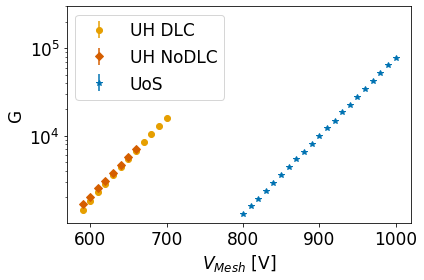

In [17]:
# Plot with data

V_vals2 = np.array(df_UHDLC.MeshVoltage.to_list()  + df_UoS.MeshVoltage.to_list())
t_vals2 = np.array(df_UHDLC.t.to_list() + df_UoS.t.to_list())


fit = np.exp(sven( (V_vals2,t_vals2) ,*coeff))

#plt.plot(V_vals2[0:len(df_UHDLC)], fit[0:len(df_UHDLC)], linestyle ='--', color = "k",linewidth=2)
#plt.plot(V_vals2[len(df_UHDLC):], fit[len(df_UHDLC):], linestyle ='--', color = "k",linewidth=2)



plt.errorbar(df_UHDLC.MeshVoltage, df_UHDLC.Gmean, yerr=get_G_sigma(df_UHDLC), marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
plt.errorbar(df_UHNoDLC.MeshVoltage,df_UHNoDLC.Gmean, yerr=get_G_sigma(df_UHNoDLC), marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
plt.errorbar(df_UoS.MeshVoltage,df_UoS.Gmean, yerr=get_G_sigma(df_UoS), marker = "*", color = colors['blue'], linestyle='None',label = "UoS")

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale("log")
plt.ylim(0,300000)
plt.ylabel("G",fontsize=17)
plt.xlabel("$V_{Mesh}$ [V]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Sven_fit_a.pdf")




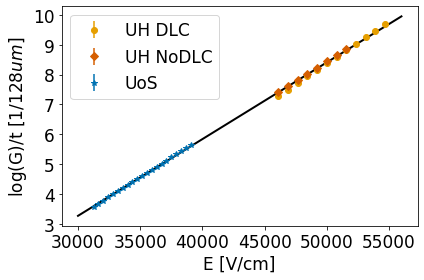

In [16]:
#plt.plot(V_vals2[0:len(df_UHDLC)]/128e-4, np.log(fit[0:len(df_UHDLC)]), linestyle ='--', color = "k",linewidth=2)
#plt.plot(V_vals2[len(df_UHDLC):]/256e-4, np.log(fit[len(df_UHDLC):])/2, linestyle ='--', color = "k",linewidth=2)

x_plot =np.arange(30000,57000,1000)
y_plot = .0201*(x_plot-17310)*128e-4


plt.plot(x_plot, y_plot, linestyle ='-', color = "k",linewidth=2)
plt.errorbar(df_UHDLC.MeshVoltage/128e-4, np.log(df_UHDLC.Gmean), yerr=get_G_sigma(df_UHDLC)/df_UHDLC.Gmean, marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
plt.errorbar(df_UHNoDLC.MeshVoltage/128e-4,np.log(df_UHNoDLC.Gmean), yerr=get_G_sigma(df_UHNoDLC)/df_UHNoDLC.Gmean, marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
plt.errorbar(df_UoS.MeshVoltage/256e-4,np.log(df_UoS.Gmean)/2, yerr=get_G_sigma(df_UoS)/df_UoS.Gmean, marker = "*", color = colors['blue'], linestyle='None',label = "UoS")

plt.legend(fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.ylabel("log(G)/t [$1/128um$]",fontsize=17)
plt.xlabel("E [V/cm]",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Sven_fit_b.pdf")

# Grain res. versus gain

In [15]:
# Fitting uncertainty and a 2.2% systematic uncertainty, propogate through natural log
def get_Gres_sigma(df):
    return ((np.sqrt(df.Gmean_err**2 + (df.Gmean*0.022)**2)/df.Gmean) + (df.Gsigma_err/df.Gsigma))*df.Gsigma/df.Gmean

In [16]:
# Fit PHA data
coeff_UHDLC, covar_UHDLC = curve_fit(stripROtools.invs, df_UHDLC.Gmean, df_UHDLC.Gsigma/df_UHDLC.Gmean, sigma = get_Gres_sigma(df_UHDLC), absolute_sigma=True, p0=(0.02,0.1))
coeff_UHNoDLC, covar_UHNoDLC = curve_fit(stripROtools.invs, df_UHNoDLC.Gmean, df_UHNoDLC.Gsigma/df_UHNoDLC.Gmean, sigma = get_Gres_sigma(df_UHNoDLC), absolute_sigma=True, p0=(0.02,0.1))
coeff_UoS, covar_UoS = curve_fit(stripROtools.invs, df_UoS.Gmean, df_UoS.Gsigma/df_UoS.Gmean, sigma = get_Gres_sigma(df_UoS), absolute_sigma=True, p0=(0.02,0.1))

# Compute fit errors
perr_UHDLC = np.sqrt(np.diag(covar_UHDLC))
perr_UHNoDLC = np.sqrt(np.diag(covar_UHNoDLC))
perr_UoS = np.sqrt(np.diag(covar_UoS))

print("UH DLC: a = ", coeff_UHDLC[0], "+/-", perr_UHDLC[0], ", b = ", coeff_UHDLC[1], "+/-", perr_UHDLC[1] )
print("UH NoDLC: a = ", coeff_UHNoDLC[0], "+/-", perr_UHNoDLC[0], ", b = ", coeff_UHNoDLC[1], "+/-", perr_UHNoDLC[1] )
print("UH UoS: a = ", coeff_UoS[0], "+/-", perr_UoS[0], ", b = ", coeff_UoS[1], "+/-", perr_UoS[1] )


UH DLC: a =  205.80254324457258 +/- 5.587661149825799 , b =  0.10031950853907902 +/- 0.001087161374465724
UH NoDLC: a =  322.59878735667826 +/- 9.641969416095133 , b =  0.12604299162658292 +/- 0.002525222284318009
UH UoS: a =  140.82889447593712 +/- 4.268706533674034 , b =  0.09697600238429468 +/- 0.000646027128305719


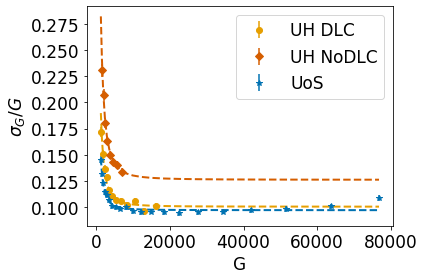

In [17]:
# Plot fractional gain resolution versus gain

x_vals = np.arange(5000,80000,5000)

plt.errorbar(df_UHDLC.Gmean,df_UHDLC.Gsigma/df_UHDLC.Gmean, yerr= get_Gres_sigma(df_UHDLC), marker = "o", color = colors['orange'], linestyle='None',label = "UH DLC")
fit_UHDLC = stripROtools.invs(df_UoS.Gmean,*coeff_UHDLC)
plt.plot(df_UoS.Gmean, fit_UHDLC, linestyle ='--', color = colors['orange'],linewidth=2)

plt.errorbar(df_UHNoDLC.Gmean,df_UHNoDLC.Gsigma/df_UHNoDLC.Gmean, yerr= get_Gres_sigma(df_UHNoDLC), marker = "D", color = colors['red'], linestyle='None',label = "UH NoDLC")
fit_UHNoDLC = stripROtools.invs(df_UoS.Gmean,*coeff_UHNoDLC)
plt.plot(df_UoS.Gmean, fit_UHNoDLC, linestyle ='--', color = colors['red'],linewidth=2)

plt.errorbar(df_UoS.Gmean,df_UoS.Gsigma/df_UoS.Gmean, yerr= get_Gres_sigma(df_UoS), marker = "*", color = colors['blue'], linestyle='None',label = "UoS")
fit_UoS = stripROtools.invs(df_UoS.Gmean,*coeff_UoS)
plt.plot(df_UoS.Gmean, fit_UoS, linestyle ='--', color = colors['blue'],linewidth=2)

plt.legend(fontsize=17)
plt.xticks([0,20000,40000,60000,80000],fontsize=17)
plt.yticks(fontsize=17)
plt.ylabel("$ \sigma_G / G$",fontsize=17)
plt.xlabel("G",fontsize=17)
plt.tight_layout()

plt.savefig("./figures/Gain_res.pdf")

